Project Title : " Property Price Prediction in India"
Project_Description : This project is about the prediction of propety prices in India.
Output: CSV file for preicted values for submission.Data Source: House train and House test data, 

In [1]:
# Importing the relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns

In [2]:
# Import train data
x_House_train = pd.read_csv("C:\\Users\\hp\Desktop\\project data\\House Price train.csv")

In [3]:
print("Train data information:\n") 
x_House_train.info()

Train data information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
POSTED_BY                29451 non-null object
UNDER_CONSTRUCTION       29451 non-null int64
RERA                     29451 non-null int64
BHK_NO.                  29451 non-null int64
BHK_OR_RK                29451 non-null object
SQUARE_FT                29451 non-null float64
READY_TO_MOVE            29451 non-null int64
RESALE                   29451 non-null int64
ADDRESS                  29451 non-null object
LONGITUDE                29451 non-null float64
LATITUDE                 29451 non-null float64
TARGET(PRICE_IN_LACS)    29451 non-null float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [4]:
print("Train data head:\n")
x_House_train.head()

Train data head:



,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [5]:
print("There is no null values in the train data:")
x_House_train.isnull().sum()

There is no null values in the train data:


POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

In [6]:
#Import the given test data set

x_House_test = pd.read_csv("D:\Data2\House Price test.csv")

print("House Test data:")
x_House_test.info()

House Test data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68720 entries, 0 to 68719
Data columns (total 11 columns):
POSTED_BY             68720 non-null object
UNDER_CONSTRUCTION    68720 non-null int64
RERA                  68720 non-null int64
BHK_NO.               68720 non-null int64
BHK_OR_RK             68720 non-null object
SQUARE_FT             68720 non-null float64
READY_TO_MOVE         68720 non-null int64
RESALE                68720 non-null int64
ADDRESS               68720 non-null object
LONGITUDE             68720 non-null float64
LATITUDE              68720 non-null float64
dtypes: float64(3), int64(5), object(3)
memory usage: 5.8+ MB


In [7]:
print("Test data 5 rows:")
x_House_test.head

Test data 5 rows:


<bound method NDFrame.head of       POSTED_BY  UNDER_CONSTRUCTION  RERA  BHK_NO. BHK_OR_RK     SQUARE_FT  \
0         Owner                   0     0        1       BHK    545.171340   
1        Dealer                   1     1        2       BHK    800.000000   
2        Dealer                   0     0        2       BHK   1257.096513   
3        Dealer                   0     0        3       BHK   1400.329489   
4         Owner                   0     0        1       BHK    430.477830   
...         ...                 ...   ...      ...       ...           ...   
68715    Dealer                   0     1        2       BHK    856.555505   
68716    Dealer                   0     1        3       BHK   2304.147465   
68717    Dealer                   1     1        1       BHK  33362.792750   
68718    Dealer                   0     0        2       BHK   1173.708920   
68719    Dealer                   0     0        3       BHK   2439.532944   

       READY_TO_MOVE  RESALE     

In [8]:
print("Test data coulmn name: It has no target price coulmn\n")
x_House_test.columns

Test data coulmn name: It has no target price coulmn



Index(['POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'BHK_OR_RK',
       'SQUARE_FT', 'READY_TO_MOVE', 'RESALE', 'ADDRESS', 'LONGITUDE',
       'LATITUDE'],
      dtype='object')

In [9]:
#Putting the data count for each value into DataFrame
df_train = pd.DataFrame(x_House_train)

In [10]:
# Calculating Skewness for the traget variable of train data set so as to find out the existence of outliers 

print("The Skewness is as given below and it is very high:")
      
df_train['TARGET(PRICE_IN_LACS)'].skew()

The Skewness is as given below and it is very high:


17.58333227553508

In [11]:
# Calculating Kurtosis for the traget variable to find out the existence of outliers 

print("Kurtosis is very high and indicates the existence of outliers.") 

df_train['TARGET(PRICE_IN_LACS)'].kurt()

Kurtosis is very high and indicates the existence of outliers.


451.9347793558902

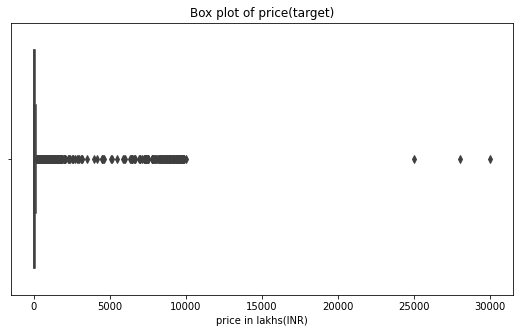

In [12]:
# Visualisation of outliers: Checking for outlier in target (price) by Box plot
fig, ax = plt.subplots(figsize=(9, 5))
sns.boxplot(df_train['TARGET(PRICE_IN_LACS)'], ax=ax)
ax.set(xlabel= 'price in lakhs(INR)', title='Box plot of price(target)')
plt.show()

In [13]:
print("Below are the 10th and 90th percentile values of target (price).\n")
print(df_train['TARGET(PRICE_IN_LACS)'].quantile(0.10))
print(df_train['TARGET(PRICE_IN_LACS)'].quantile(0.90))

Below are the 10th and 90th percentile values of target (price).

25.0
200.0


In [14]:
df_train["TARGET(PRICE_IN_LACS)"] = np.where(df_train["TARGET(PRICE_IN_LACS)"] <25.0, 25.0,df_train['TARGET(PRICE_IN_LACS)'])
df_train["TARGET(PRICE_IN_LACS)"] = np.where(df_train["TARGET(PRICE_IN_LACS)"] >200.0, 200.0,df_train['TARGET(PRICE_IN_LACS)'])
print(df_train['TARGET(PRICE_IN_LACS)'].skew())

1.0575886712996754


In [15]:
print(df_train['TARGET(PRICE_IN_LACS)'].kurt())

-0.09271145400110914


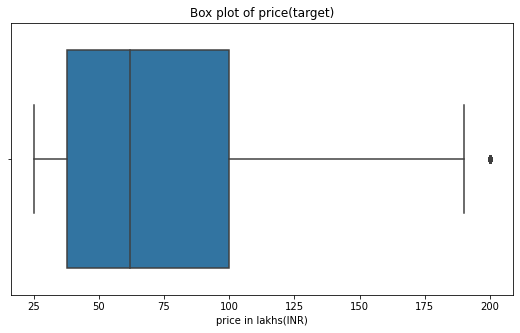

In [16]:
#Below is the box plot of Price (Target) after outlier treatment:
fig, ax = plt.subplots(figsize=(9, 5))
sns.boxplot(df_train['TARGET(PRICE_IN_LACS)'], ax=ax)
ax.set(xlabel= 'price in lakhs(INR)', title='Box plot of price(target)')
plt.show()

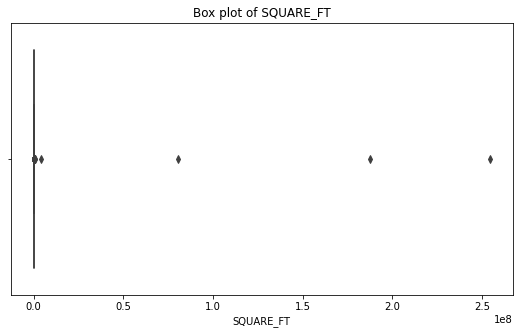

In [17]:
# Visualisation of outliers for outlier in SQUARE_FT variable by Box plot
fig, ax = plt.subplots(figsize=(9, 5))
sns.boxplot(df_train['SQUARE_FT'], ax=ax)
ax.set(xlabel= 'SQUARE_FT', title='Box plot of SQUARE_FT')
plt.show()

In [18]:
# Rectifying Outlier in Square_Feet Variable

df_train["SQUARE_FT"] = np.where(df_train["SQUARE_FT"] <640.11, 640.11,df_train['SQUARE_FT'])
df_train["SQUARE_FT"] = np.where(df_train["SQUARE_FT"] >2050.58, 2050.58,df_train['SQUARE_FT'])
print(df_train['SQUARE_FT'].skew())

0.4215470665248254


In [19]:
print(df_train['SQUARE_FT'].kurt())

-0.874454950785462


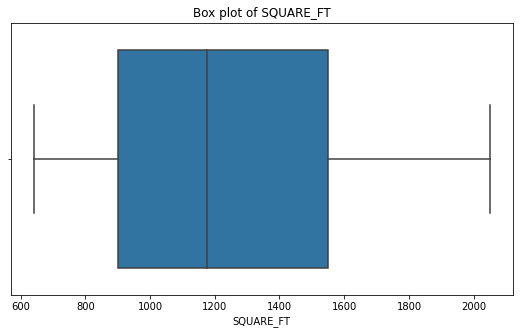

In [20]:
#Below is the box plot of Square_Feet after outlier treatment:

fig, ax = plt.subplots(figsize=(9, 5))
sns.boxplot(df_train['SQUARE_FT'], ax=ax)
ax.set(xlabel= 'SQUARE_FT', title='Box plot of SQUARE_FT')
plt.show()


Insights:
The price target (i.e TARGET(PRICE_IN_LACS) variable had the outlier and it has been removed succesfully with quantile techinique.
The square feet (i.e SQUARE_FT) variable is an important variable  and it also had the outlier which was also removed using similar technique.            
It can be seen from the price box plot that most of market price of the property ranges between 27 lacs to 1 crore.
It can also bee seen from the square box plot that most of the propert area falls between 850 suare feet to 1500 suare feet.

<AxesSubplot:>

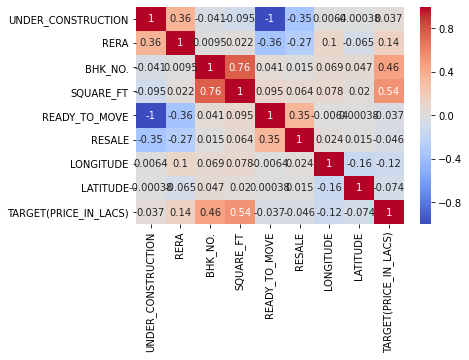

In [21]:
#correlation among features
sns.heatmap(df_train.corr(),cmap="coolwarm", annot=True)

Insights:
BHK, Resale, Square_FT RERA Approval variables have positive correlations wit target price variable.


In [22]:
df_train.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000
mean,0.179756,0.317918,2.392279,1241.636677,0.820244,0.929578,21.300255,76.837695,80.804193
std,0.383991,0.465675,0.879091,441.517115,0.383991,0.255861,6.205306,10.557747,55.443547
min,0.000000,0.000000,1.000000,640.110000,0.000000,0.000000,-37.713008,-121.761248,25.000000
25%,0.000000,0.000000,2.000000,900.021130,1.000000,1.000000,18.452663,73.798100,38.000000
50%,0.000000,0.000000,2.000000,1175.056750,1.000000,1.000000,20.750000,77.324137,62.000000
75%,0.000000,1.000000,3.000000,1550.688124,1.000000,1.000000,26.900926,77.828740,100.000000
max,1.000000,1.000000,20.000000,2050.580000,1.000000,1.000000,59.912884,152.962676,200.000000


In [23]:
#Checking the value counts for each feature of train data set: 
def value_count(df_train):
    
    for var in df_train.columns:
        print(df_train[var].value_counts())
    
    print("----")

value_count(df_train)

Dealer     18291
Owner      10538
Builder      622
Name: POSTED_BY, dtype: int64
0    24157
1     5294
Name: UNDER_CONSTRUCTION, dtype: int64
0    20088
1     9363
Name: RERA, dtype: int64
2     13324
3     10546
1      3574
4      1723
5       190
6        52
7        11
8        10
15        4
10        4
20        4
12        3
9         3
13        1
11        1
17        1
Name: BHK_NO., dtype: int64
BHK    29427
RK        24
Name: BHK_OR_RK, dtype: int64
2050.580000    2946
640.110000     2944
1000.000000     479
1250.000000     294
800.000000      202
               ... 
1684.001981       1
1274.013478       1
1383.862040       1
1835.781041       1
1659.995787       1
Name: SQUARE_FT, Length: 15150, dtype: int64
1    24157
0     5294
Name: READY_TO_MOVE, dtype: int64
1    27377
0     2074
Name: RESALE, dtype: int64
Zirakpur,Chandigarh                     509
Whitefield,Bangalore                    230
Raj Nagar Extension,Ghaziabad           215
Sector-137 Noida,Noida           

Feature Selection:
Step-1: Utilizing the Indian cities' classification into tier_one, tier_two available at https://en.wikipedia.org/wiki/Classification_of_Indian_cities. 
Step-2: Cretating lists of tier_one and tier_two so that could be used as location based feature for determination of property price.

In [24]:
tier_one_cities = ['Ahmedabad', 'Bangalore', 'Chennai', 'Delhi', 'Hyderabad', 'Kolkata', 'Mumbai', 'Pune']
tier_two_cities = ['Agra', 'Ajmer', 'Aligarh', 'Amravati', 'Amritsar', 'Asansol', 'Aurangabad', 'Bareilly', 'Belgaum', 'Bhavnagar', 'Bhiwandi', 
                 'Bhopal', 'Bhubaneswar', 'Bikaner', 'Bilaspur', 'Bokaro Steel City', 'Chandigarh', 'Coimbatore', 'Cuttack', 'Dehradun', 'Dhanbad',
                 'Bhilai', 'Durgapur', 'Dindigul', 'Erode', 'Faridabad', 'Firozabad', 'Ghaziabad', 'Gorakhpur', 'Gulbarga', 'Guntur', 'Gwalior', 
                 'Gurgaon', 'Guwahati', 'Hamirpur', 'Hubli–Dharwad', 'Indore', 'Jabalpur', 'Jaipur', 'Jalandhar', 'Jammu', 'Jamnagar', 'Jamshedpur', 
                 'Jhansi', 'Jodhpur', 'Kakinada', 'Kannur', 'Kanpur', 'Karnal', 'Kochi', 'Kolhapur', 'Kollam', 'Kozhikode', 'Kurnool', 'Ludhiana', 
                 'Lucknow', 'Madurai', 'Malappuram', 'Mathura', 'Mangalore', 'Meerut', 'Moradabad', 'Mysore', 'Nagpur', 'Nanded', 'Nashik', 'Nellore',
                 'Noida', 'Patna', 'Pondicherry', 'Purulia', 'Prayagraj', 'Raipur', 'Rajkot', 'Rajahmundry', 'Ranchi', 'Rourkela', 'Salem', 'Sangli', 
                 'Shimla', 'Siliguri', 'Solapur', 'Srinagar', 'Surat', 'Thanjavur', 'Thiruvananthapuram', 'Thrissur', 'Tiruchirappalli', 'Tirunelveli', 
                 'Ujjain', 'Bijapur', 'Vadodara', 'Varanasi', 'Vasai-Virar City', 'Vijayawada', 'Visakhapatnam', 'Vellore', 'Warangal']

#Creating a new variable out of Address coulmn and termed it as "City"

In [25]:
#Printing City variable

df_train['city'] = df_train['ADDRESS'].str.split(",").str[-1]

df_train.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),city
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0,Bangalore
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0,Mysore
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0,Bangalore
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5,Ghaziabad
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5,Kolkata


In [26]:
# Diffrent Cities with number of property
df_train.groupby(['city'])['ADDRESS'].count().reset_index(name= 'count').sort_values(['count'], ascending=False).head(10)

,city,count
21,Bangalore,4340
142,Lalitpur,2993
158,Mumbai,2023
192,Pune,1991
172,Noida,1767
134,Kolkata,1709
148,Maharashtra,1579
49,Chennai,1255
78,Ghaziabad,1087
105,Jaipur,962


Classifiying the city data obtained out of Address into tier_one, tier_two and other categories so that these can be used a variable of location which is itself a detrimnant of property price.

In [27]:
def check_city_tier(row, tier_val):
    if tier_val == 1:
        if row['city'] in tier_one_cities:
            return 1
    elif tier_val == 2:
        if row['city'] in tier_two_cities:
            return 1
    elif tier_val == 3:
        if row['city'] not in tier_one_cities and row['city'] not in tier_two_cities:
            return 1
    return 0

df_train['tier_one_city'] = df_train.apply(check_city_tier, args=([1]), axis=1)
df_train['tier_two_city'] = df_train.apply(check_city_tier, args=([2]), axis=1)
df_train['tier_other_cities'] = df_train.apply(check_city_tier, args=([3]), axis=1)

df_train

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),city,tier_one_city,tier_two_city,tier_other_cities
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0,Bangalore,1,0,0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0,Mysore,0,1,0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0,Bangalore,1,0,0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5,Ghaziabad,0,1,0
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5,Kolkata,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29446,Owner,0,0,3,BHK,2050.580000,1,1,"Shamshabad Road,Agra",27.140626,78.043277,45.0,Agra,0,1,0
29447,Owner,0,0,2,BHK,769.230769,1,1,"E3-108, Lake View Recidency,,Vapi",39.945409,-86.150721,25.0,Vapi,0,0,1
29448,Dealer,0,0,2,BHK,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1,Jaipur,0,1,0
29449,Owner,0,0,2,BHK,927.079009,1,1,"Sholinganallur,Chennai",12.900150,80.227910,67.0,Chennai,1,0,0


#Preprocessing of Variables to get transformed database
Applying the Preprocessing and performing the encoding of the columns so that we will get a  new tranformed train dataset:

In [28]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

transformer = ColumnTransformer(transformers=[("posted_by_transform", OneHotEncoder(), ['POSTED_BY'])], remainder='passthrough')

train_df_tranformed = pd.DataFrame(transformer.fit_transform(df_train))

# Set Column names in for the transformed Dataframe
train_df_tranformed.columns = ['POSTED_BY_builder', 'POSTED_BY_dealer', 'POSTED_BY_Owner','UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'BHK_OR_RK', 'SQUARE_FT', 
                               'READY_TO_MOVE', 'RESALE', 'ADDRESS', 'LONGITUDE', 'LATITUDE', 'TARGET(PRICE_IN_LACS)', 'city', 'tier_one_city', 'tier_two_city', 
                               'tier_other_cities']

train_df_tranformed

,POSTED_BY_builder,POSTED_BY_dealer,POSTED_BY_Owner,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),city,tier_one_city,tier_two_city,tier_other_cities
0,0,0,1,0,0,2,BHK,1300.24,1,1,"Ksfc Layout,Bangalore",12.9699,77.598,55,Bangalore,1,0,0
1,0,1,0,0,0,2,BHK,1275,1,1,"Vishweshwara Nagar,Mysore",12.2745,76.6446,51,Mysore,0,1,0
2,0,0,1,0,0,2,BHK,933.16,1,1,"Jigani,Bangalore",12.778,77.6322,43,Bangalore,1,0,0
3,0,0,1,0,1,2,BHK,929.921,1,1,"Sector-1 Vaishali,Ghaziabad",28.6423,77.3445,62.5,Ghaziabad,0,1,0
4,0,1,0,1,0,2,BHK,999.009,0,1,"New Town,Kolkata",22.5922,88.4849,60.5,Kolkata,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29446,0,0,1,0,0,3,BHK,2050.58,1,1,"Shamshabad Road,Agra",27.1406,78.0433,45,Agra,0,1,0
29447,0,0,1,0,0,2,BHK,769.231,1,1,"E3-108, Lake View Recidency,,Vapi",39.9454,-86.1507,25,Vapi,0,0,1
29448,0,1,0,0,0,2,BHK,1022.64,1,1,"Ajmer Road,Jaipur",26.9288,75.828,27.1,Jaipur,0,1,0
29449,0,0,1,0,0,2,BHK,927.079,1,1,"Sholinganallur,Chennai",12.9002,80.2279,67,Chennai,1,0,0


#Further classifying the Posted by column into posted by_dealer, posted by_owner and posted by_builder.
Assumption: Although, locational features are an important detriminant of the property purchase but in the given data set we are given values of location features in terms of lattitude and longitude (i.e distance coordinates) therefore it is imperative to invoke an assumption that distance from city centre is to be takin into consideration while taking location as determinant of property price. Therefore, in the following data analysis only important features of intrest are grouped.

In [29]:
selected_features = ['POSTED_BY_builder', 'POSTED_BY_dealer', 'POSTED_BY_Owner','UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.',
       'SQUARE_FT', 'READY_TO_MOVE', 'RESALE', 'TARGET(PRICE_IN_LACS)', 'tier_one_city',
       'tier_two_city', 'tier_other_cities']

#selected_features = ['BHK_NO.', 'RESALE', 'SQUARE_FT', 'TARGET(PRICE_IN_LACS)']

df_selected_features = train_df_tranformed[selected_features]

for feature in selected_features:
    
    df_selected_features[feature] =  pd.to_numeric(df_selected_features[feature])
    
df_selected_features

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,POSTED_BY_builder,POSTED_BY_dealer,POSTED_BY_Owner,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,TARGET(PRICE_IN_LACS),tier_one_city,tier_two_city,tier_other_cities
0,0.0,0.0,1.0,0,0,2,1300.236407,1,1,55.0,1,0,0
1,0.0,1.0,0.0,0,0,2,1275.000000,1,1,51.0,0,1,0
2,0.0,0.0,1.0,0,0,2,933.159722,1,1,43.0,1,0,0
3,0.0,0.0,1.0,0,1,2,929.921143,1,1,62.5,0,1,0
4,0.0,1.0,0.0,1,0,2,999.009247,0,1,60.5,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29446,0.0,0.0,1.0,0,0,3,2050.580000,1,1,45.0,0,1,0
29447,0.0,0.0,1.0,0,0,2,769.230769,1,1,25.0,0,0,1
29448,0.0,1.0,0.0,0,0,2,1022.641509,1,1,27.1,0,1,0
29449,0.0,0.0,1.0,0,0,2,927.079009,1,1,67.0,1,0,0


#Splitting the train dataset into train and test to Apply Modelling Technique 

In [30]:
from sklearn.model_selection import train_test_split

#train, test = train_test_split(df_selected_features,test_size=0.20, random_state=0)
train, test = train_test_split(df_selected_features,test_size=0.20, random_state=0, stratify=df_selected_features[['READY_TO_MOVE', 'RESALE', 'UNDER_CONSTRUCTION', 'RERA']])

X_train = train[train.columns.difference(['TARGET(PRICE_IN_LACS)'])]
y_train = train['TARGET(PRICE_IN_LACS)']

X_test = test[test.columns.difference(['TARGET(PRICE_IN_LACS)'])]
y_test = test['TARGET(PRICE_IN_LACS)']


In [31]:
print("X-train data information:\n")
X_train.info()

print("\n X-test data information:")
X_test.info()

X-train data information:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23560 entries, 20662 to 7791
Data columns (total 12 columns):
BHK_NO.               23560 non-null int64
POSTED_BY_Owner       23560 non-null float64
POSTED_BY_builder     23560 non-null float64
POSTED_BY_dealer      23560 non-null float64
READY_TO_MOVE         23560 non-null int64
RERA                  23560 non-null int64
RESALE                23560 non-null int64
SQUARE_FT             23560 non-null float64
UNDER_CONSTRUCTION    23560 non-null int64
tier_one_city         23560 non-null int64
tier_other_cities     23560 non-null int64
tier_two_city         23560 non-null int64
dtypes: float64(4), int64(8)
memory usage: 2.3 MB

 X-test data information:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5891 entries, 6414 to 13615
Data columns (total 12 columns):
BHK_NO.               5891 non-null int64
POSTED_BY_Owner       5891 non-null float64
POSTED_BY_builder     5891 non-null float64
POSTED_BY_dealer   

#Model Building up using following algorithms:
    
Linear Regression
KNN Regression
Random Forest
XG Boost

In [32]:
# Linear Regression

from sklearn.linear_model import LinearRegression

lin_reg_model = LinearRegression()

lin_reg_model.fit(X_train, y_train)

print('LinearRegressor: ', lin_reg_model.score(X_test, y_test))

LinearRegressor:  0.49679465488811647


In [34]:
# KNN Regression

from sklearn.neighbors import KNeighborsRegressor

knn_reg_model = KNeighborsRegressor(n_neighbors=5)

knn_reg_model.fit(X_train, y_train)

print('KNN Regressor: ', knn_reg_model.score(X_test, y_test))

KNN Regressor:  0.5220092544388071


In [35]:
# Random Forest

from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

preds = rf_model.predict(X_test)

print('Random Forest: ', r2_score(y_test, preds))

Random Forest:  0.5768264714430713


In [36]:
# XG Boost

from xgboost import XGBRegressor

xgboost_model = XGBRegressor(n_estimators=1000, learning_rate=0.1, random_state=42)

xgboost_model.fit(X_train, y_train)

preds = xgboost_model.predict(X_test)

print('XG Boost: ', r2_score(y_test, preds))

XG Boost:  0.6230115669728402


# Model Values obtained under different  models for train data set by train_test_split operation

In [37]:
model_values = {"Regressor_Linear": "0.49679465488811647", "KNN Regressor":"0.5220092544388071", "Random Forest": " 0.5768264714430713", "XG Boost":  " 0.6230115669728402"}

print ("Below are the computed values (r2_accuracy_prediction) of four different models:")
         
for k, v in model_values.items(): # We can use key and value instead of k, v
    
    print(f"\nKey: {k}") # The item method returns the list of key value item pair
   
    print(f"\nValue: {v}")
    


Below are the computed values (r2_accuracy_prediction) of four different models:

Key: Regressor_Linear

Value: 0.49679465488811647

Key: KNN Regressor

Value: 0.5220092544388071

Key: Random Forest

Value:  0.5768264714430713

Key: XG Boost

Value:  0.6230115669728402


Insights:
XG bosst regressor Algorithm has performed well with 0.62 or 62% accuracy.
Random forests Algorithm has turned out to be second best performer while Linear regressor has 49.67% regressor.
It will be fruitful to apply XG Boost algorithm onto the test data so as to get predicive values of price.
    

Feature Selection for Test Dataset:
Step-1: Import the given test data
Step-2 : Classifying city based on teir classification
Step-3 : Transform the data by encoding method
Step-4 : APlly the XGBoost Algorith and get the output in csv file for submission.



In [38]:
#Import the given test data set

x_House_test = pd.read_csv("D:\Data2\House Price test.csv")

df_test = x_House_test

print ("Test Data Information:\n ")
df_test.head()

Test Data Information:
 


,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
0,Owner,0,0,1,BHK,545.171340,1,1,"Kamrej,Surat",21.262000,73.047700
1,Dealer,1,1,2,BHK,800.000000,0,0,"Panvel,Lalitpur",18.966114,73.148278
2,Dealer,0,0,2,BHK,1257.096513,1,1,"New Town,Kolkata",22.592200,88.484911
3,Dealer,0,0,3,BHK,1400.329489,1,1,"Kalwar Road,Jaipur",26.988300,75.584600
4,Owner,0,0,1,BHK,430.477830,1,1,"Mai Mandir,Nadiad",22.700000,72.870000


In [39]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68720 entries, 0 to 68719
Data columns (total 11 columns):
POSTED_BY             68720 non-null object
UNDER_CONSTRUCTION    68720 non-null int64
RERA                  68720 non-null int64
BHK_NO.               68720 non-null int64
BHK_OR_RK             68720 non-null object
SQUARE_FT             68720 non-null float64
READY_TO_MOVE         68720 non-null int64
RESALE                68720 non-null int64
ADDRESS               68720 non-null object
LONGITUDE             68720 non-null float64
LATITUDE              68720 non-null float64
dtypes: float64(3), int64(5), object(3)
memory usage: 5.8+ MB


In [40]:

# Working out City Tier Features:

df_test['city'] = df_test['ADDRESS'].str.split(",").str[-1]


# Using Apply function:

df_test['tier_one_city'] = df_test.apply(check_city_tier, args=([1]), axis=1)

df_test['tier_two_city'] = df_test.apply(check_city_tier, args=([2]), axis=1)

df_test['tier_other_cities'] = df_test.apply(check_city_tier, args=([3]), axis=1)



In [41]:
# Encoding for POSTED_BY

df_test_tranfo = pd.DataFrame(transformer.fit_transform(df_test))


In [42]:
df_test_tranfo.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0,0,1,0,0,1,BHK,545.171,1,1,"Kamrej,Surat",21.262,73.0477,Surat,0,1,0
1,0,1,0,1,1,2,BHK,800,0,0,"Panvel,Lalitpur",18.9661,73.1483,Lalitpur,0,0,1
2,0,1,0,0,0,2,BHK,1257.1,1,1,"New Town,Kolkata",22.5922,88.4849,Kolkata,1,0,0
3,0,1,0,0,0,3,BHK,1400.33,1,1,"Kalwar Road,Jaipur",26.9883,75.5846,Jaipur,0,1,0
4,0,0,1,0,0,1,BHK,430.478,1,1,"Mai Mandir,Nadiad",22.7,72.87,Nadiad,0,0,1


In [43]:
# Set Column names in the transformed Dataframe

df_test_tranfo.columns = ['POSTED_BY_builder', 'POSTED_BY_dealer', 'POSTED_BY_Owner','UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'BHK_OR_RK', 'SQUARE_FT', 
                               'READY_TO_MOVE', 'RESALE', 'ADDRESS', 'LONGITUDE', 'LATITUDE', 'city', 'tier_one_city', 'tier_two_city','tier_other_cities']

In [44]:
# Making Prediction of Property Price (Sale) by employing the trained XG Boost model

selected_features = ['BHK_NO.', 'POSTED_BY_Owner', 'POSTED_BY_builder', 'POSTED_BY_dealer',
       'READY_TO_MOVE', 'RERA', 'RESALE', 'SQUARE_FT', 'UNDER_CONSTRUCTION',
       'tier_one_city', 'tier_two_city', 'tier_other_cities']

X_test= df_test_tranfo[selected_features]

for feature in selected_features:
    
    X_test[feature] =  pd.to_numeric(X_test[feature])

df_test_output = xgboost_model.predict(X_test)



C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [45]:
# Model_Output Save to submission.csv file

df_output = pd.DataFrame({'Id': X_test.index, 'Predicted Poperty Price (Sale)': df_test_output})

# Model Output Saved in CSV File for Submission

df_output.to_csv('submit_IITR.csv', index=False)

print(f"END of Project")

df_output.head(21)




END of Project


,Id,Predicted Poperty Price (Sale)
0,0,27.888756
1,1,48.668346
2,2,82.399940
3,3,121.493683
4,4,26.451591
5,5,30.183371
6,6,23.342308
7,7,79.499161
8,8,27.754091
9,9,56.597725
